In [1]:
import os
import json

In [2]:
with open('charid2desc.json','r') as f:
    import json
    charid2desc = json.load(f)

In [5]:
charid2desc = {k:v for k,v in charid2desc.items() if v}

In [9]:
desc_text = ' '.join(list(charid2desc.values()))

In [11]:
import numpy as np 
 #neccessary for wordcloud
from PIL import Image,ImageOps
 #pillow module neccessary for wordcloud
import matplotlib.pyplot as plt
 #to show and save image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator #the real wordcloud module
from scipy.ndimage import gaussian_gradient_magnitude #edge detection

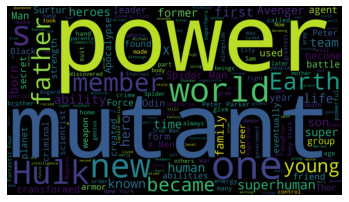

In [13]:
canvas_width=1920
  #width of the output image
canvas_height=1080  #height of the output image
wordcloud = WordCloud(width=canvas_width,height=canvas_height).generate(desc_text)
 #generate wordcloud
wordcloud.to_file("simple_wordcloud.png") #save the output wordcloud in png format
plt.imshow(wordcloud, interpolation='bilinear')
 #show the image output 
plt.axis("off") 
plt.show()

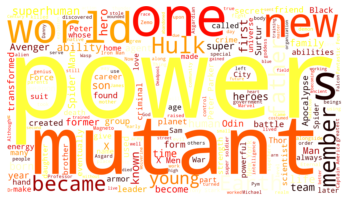

In [16]:
stopwords = set(STOPWORDS)
stopwords.add("thy")
wordcloud = WordCloud(stopwords=stopwords,background_color='white',random_state=1,colormap='hot',max_font_size=800,min_font_size=20,width=canvas_width,height=canvas_height).generate(desc_text)
plt.imshow(wordcloud, interpolation='bilinear')
 #show the image output 
plt.axis("off") 
plt.show()

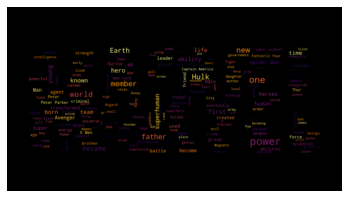

In [19]:
romeo_mask= np.array(Image.open("Font-Marvel-Logo.jpeg"))
 #read image
wc = WordCloud(mask=romeo_mask,colormap='inferno',random_state=5,max_font_size=50,min_font_size=0)
 #configure wordcloud
wc.generate(desc_text)
 #generate wordcloud with text data
# wc.to_file("masked_wc.jpg")
 #save image
plt.imshow(wc, interpolation='bilinear') #show image
plt.axis("off")
 #off axis on image
plt.show() #show image

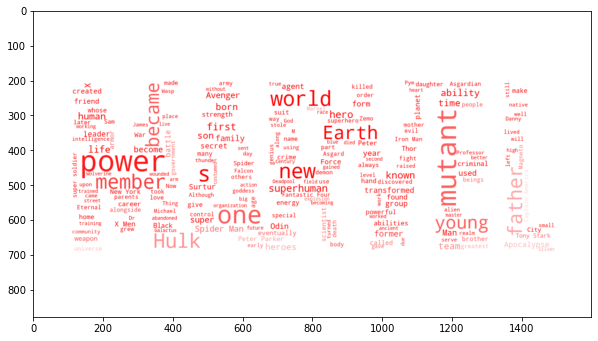

In [22]:
image = np.array(Image.open("Font-Marvel-Logo.jpeg"))


image_mask = image.copy()
image[image_mask.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(image[:, :, i] / 255., 2) for i in range(3)], axis=0)
image_mask[edges > .1] = 255
wc = WordCloud(background_color='white', mask=image_mask, mode='RGBA')
wc.generate(desc_text)
image_colors = ImageColorGenerator(image)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("marvel_wordcloud.png")

## zoom in/out

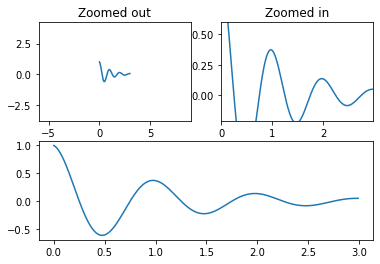

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
d = pd.read_csv("data_vis.csv")

NameError: name 'plot3' is not defined

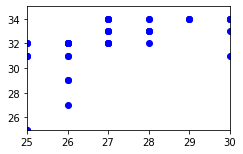

In [31]:
from matplotlib.patches import ConnectionPatch
fig = plt.figure(figsize=(8, 5))
#the plot with blue dots
plot2 = fig.add_subplot(2, 2, 2)
plot2.scatter(d['city-mpg'], d['highway-mpg'], color = 'blue')
plot2.set_xlim(25, 30)
plot2.set_ylim(25, 35)#highlighting the portion of original plot to zoon in 
plot3.fill_between((15, 20), 10, 60, facecolor= "red", alpha = 0.2)
plot3.fill_between((25, 30), 10, 60, facecolor= "blue", alpha = 0.2)#connecting line between the rightcorner of plot1 and the right #corner of the red hightlight
conn2 = ConnectionPatch(xyA = (20, 17), coordsA=plot1.transData,
                       xyB=(20, 20), coordsB=plot3.transData, color = 'red')
fig.add_artist(conn2) #connecting line between the right corner of plot2 and the right #corner of the blue hightlight
conn4 = ConnectionPatch(xyA = (30, 25), coordsA=plot2.transData,
                       xyB=(30, 30), coordsB=plot3.transData, color = 'blue')
fig.add_artist(conn4)

AttributeError: 'NoneType' object has no attribute 'push_current'

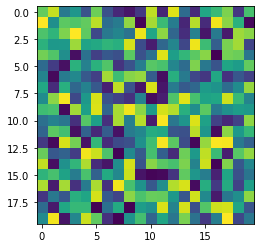

In [33]:
fig, ax = plt.subplots(1, 1)
ax.imshow(np.random.rand(20, 20))
fig.canvas.toolbar.push_current()  # save the 'un zoomed' view to stack
ax.set_xlim([5, 10])
ax.set_ylim([5, 10])
fig.canvas.toolbar.push_current()  # save 'zoomed' view to stack

In [34]:
import gi
gi.require_version('Gtk', '3.0')
from gi.repository import Gtk

from matplotlib.figure import Figure
from matplotlib.backends.backend_gtk3agg import FigureCanvas
from matplotlib.backends.backend_gtk3 import (
    NavigationToolbar2GTK3 as NavigationToolbar)

win = Gtk.Window()
win.connect("destroy", lambda x: Gtk.main_quit())
win.set_default_size(400,300)
win.set_title("Embedding in GTK")

vbox = Gtk.VBox()
win.add(vbox)

fig = Figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot([1,2,3])

canvas = FigureCanvas(fig)  # a Gtk.DrawingArea
vbox.pack_start(canvas, True, True, 0)
toolbar = NavigationToolbar(canvas, win)
vbox.pack_start(toolbar, False, False, 0)

win.show_all()
Gtk.main()

ModuleNotFoundError: No module named 'gi'